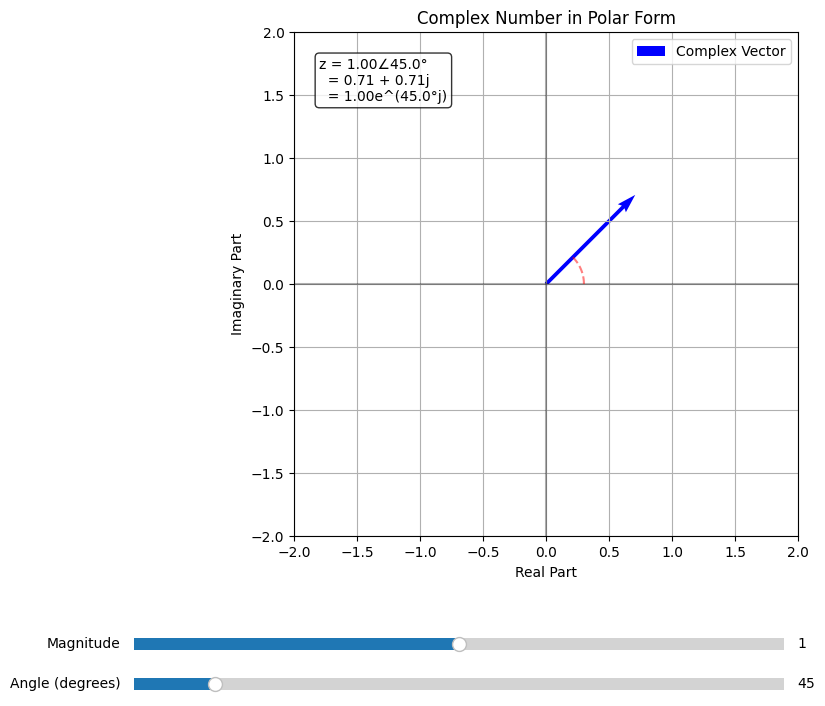

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import torch
import cmath

class ComplexNumberVisualizer:
    def __init__(self):
        # Create the figure and axis
        self.fig, self.ax = plt.subplots(figsize=(10, 8))
        plt.subplots_adjust(bottom=0.25)  # Make room for sliders

        # Initial values
        self.magnitude = 1.0
        self.angle_deg = 45.0

        # Calculate initial complex number
        self.z = self.magnitude * np.exp(1j * np.deg2rad(self.angle_deg))

        # Set up the plot
        self.setup_plot()

        # Create sliders
        self.create_sliders()

        # Initial plot
        self.update_plot()

    def setup_plot(self):
        # Set equal aspect ratio
        self.ax.set_aspect('equal')

        # Set limits
        self.ax.set_xlim(-2, 2)
        self.ax.set_ylim(-2, 2)

        # Add grid
        self.ax.grid(True)

        # Add axes
        self.ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        self.ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Label axes
        self.ax.set_xlabel('Real Part')
        self.ax.set_ylabel('Imaginary Part')
        self.ax.set_title('Complex Number in Polar Form')

    def create_sliders(self):
        # Create axes for sliders
        ax_magnitude = plt.axes([0.1, 0.1, 0.65, 0.03])
        ax_angle = plt.axes([0.1, 0.05, 0.65, 0.03])

        # Create sliders
        self.s_magnitude = Slider(ax_magnitude, 'Magnitude', 0, 2,
                                valinit=self.magnitude)
        self.s_angle = Slider(ax_angle, 'Angle (degrees)', 0, 360,
                             valinit=self.angle_deg)

        # Register update function with each slider
        self.s_magnitude.on_changed(self.update)
        self.s_angle.on_changed(self.update)

    def update(self, val):
        # Get current slider values
        self.magnitude = self.s_magnitude.val
        self.angle_deg = self.s_angle.val

        # Update complex number
        self.z = self.magnitude * np.exp(1j * np.deg2rad(self.angle_deg))

        # Update plot
        self.update_plot()

        # Redraw canvas
        self.fig.canvas.draw_idle()

    def update_plot(self):
        # Clear the axis
        self.ax.clear()
        self.setup_plot()

        # Plot vector
        self.ax.quiver(0, 0, self.z.real, self.z.imag,
                      angles='xy', scale_units='xy', scale=1,
                      color='blue', label='Complex Vector')

        # Plot arc for angle
        angle_rad = np.deg2rad(self.angle_deg)
        arc = np.linspace(0, angle_rad, 100)
        arc_radius = 0.3 * self.magnitude
        self.ax.plot(arc_radius * np.cos(arc),
                    arc_radius * np.sin(arc),
                    'r--', alpha=0.5)

        # Add text annotation
        text = f'z = {self.magnitude:.2f}∠{self.angle_deg:.1f}°\n'
        text += f'  = {self.z.real:.2f} + {self.z.imag:.2f}j\n'
        text += f'  = {self.magnitude:.2f}e^({self.angle_deg:.1f}°j)'
        self.ax.text(0.05, 0.95, text,
                    transform=self.ax.transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Add legend
        self.ax.legend()

    def show(self):
        plt.show()

# Example usage for single complex number visualization
viz = ComplexNumberVisualizer()
viz.show()

# Example of visualizing multiple complex numbers (similar to your torch code)
def visualize_complex_sequence():
    # Create sequence length and dimension
    seq_len = 4
    head_dim = 6  # Must be even

    # Create position indices
    m = torch.arange(seq_len).float()

    # Create frequency factors
    theta = torch.arange(0, head_dim, 2).float() / head_dim

    # Compute outer product
    freqs = torch.outer(m, theta).float()

    # Compute complex numbers
    freqs_complex = torch.polar(torch.ones_like(freqs), freqs)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')

    # Plot each complex number
    for i in range(seq_len):
        for j in range(head_dim // 2):
            z = complex(freqs_complex[i, j].real, freqs_complex[i, j].imag)
            ax.quiver(0, 0, z.real, z.imag,
                     angles='xy', scale_units='xy', scale=1,
                     alpha=0.5, label=f'pos={i}, dim={j}')

    # Setup plot
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.set_title('Rotary Position Embedding Complex Numbers')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

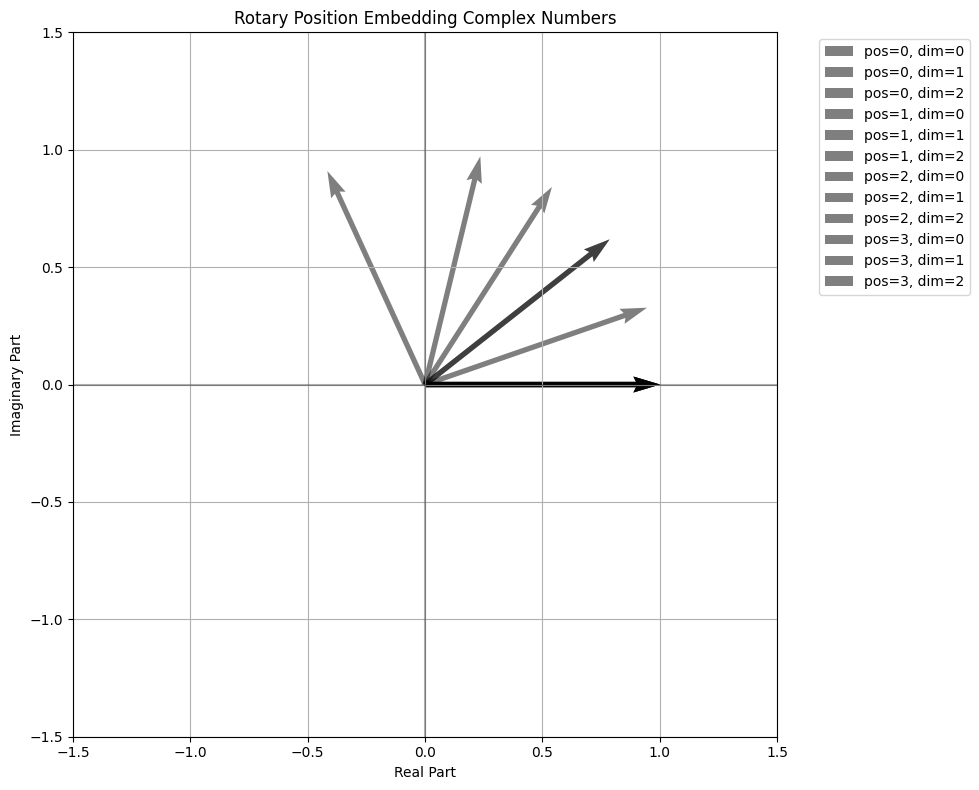

In [4]:
visualize_complex_sequence()